In [47]:
import pandas as pd
import os
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import numpy as np

In [59]:
# Function to count comments in a row
def count_comments(row):
    # Check for empty or null values
    if row in ['', None, np.nan]:
        return 0

    # Check if it's a string (for line-based counting)
    if isinstance(row, str):
        # Count lines based on separators (\n, \n\n, .)
        return len([line for line in row.split('\n') if line.strip()])  # Counting non-empty lines

    # Check if it's a list (counting elements)
    elif isinstance(row, list):
        # Flatten nested lists
        flattened_list = []
        for item in row:
            if isinstance(item, list):  # If the item is a nested list
                flattened_list.extend(item)
            else:
                flattened_list.append(item)
        return len(flattened_list)

    return 0  # Default case

In [2]:
base_dir = os.getcwd()  # Get the script's directory
output_dir = os.path.join(base_dir, "..", "..", "output")

file_path1 = os.path.join(output_dir, "auto_labeled_data.xlsx")
df1 = pd.read_excel(file_path1)

In [5]:
df1.isnull().sum()

Message_ID                   0
Date                         0
Combined_text              259
Total_Comments             276
Text_Positive_Reactions      0
Text_Negative_Reactions      0
dtype: int64

In [6]:
df1 = df1[~df1['Combined_text'].isna()].reset_index(drop=True)

In [7]:
df1.isnull().sum()

Message_ID                  0
Date                        0
Combined_text               0
Total_Comments             17
Text_Positive_Reactions     0
Text_Negative_Reactions     0
dtype: int64

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
labels = ["positive", "negative", "neutral"]

In [ ]:
df1["Classification"] = df1["Combined_text"].apply(
    lambda x: classifier(x, labels)["labels"][0])

In [ ]:
file_path1 = os.path.join(output_dir, "data_with_sentiment.xlsx")
df1.to_excel(file_path1, index=False)

In [76]:
base_dir = os.getcwd()  # Get the script's directory
output_dir = os.path.join(base_dir, "..", "..", "output")

file_path1 = os.path.join(output_dir, "data_with_sentiment.xlsx")
df2 = pd.read_excel(file_path1)

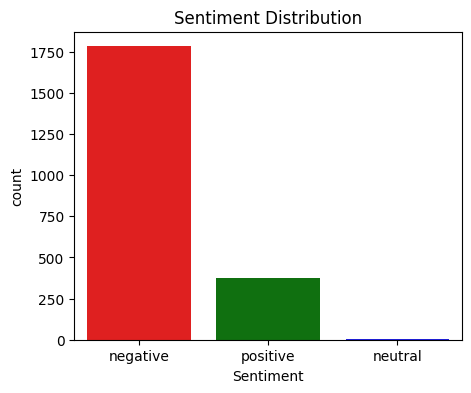

In [71]:
# Sentiment distribution with custom colors
plt.figure(figsize=(5,4))
sns.countplot(x=df2['Sentiment'], palette=['red', 'green', 'blue'], hue=df2['Sentiment']
)

plt.title("Sentiment Distribution")
plt.savefig(os.path.join(output_dir, "sentiment_distribution.png"), dpi=300)
plt.show()

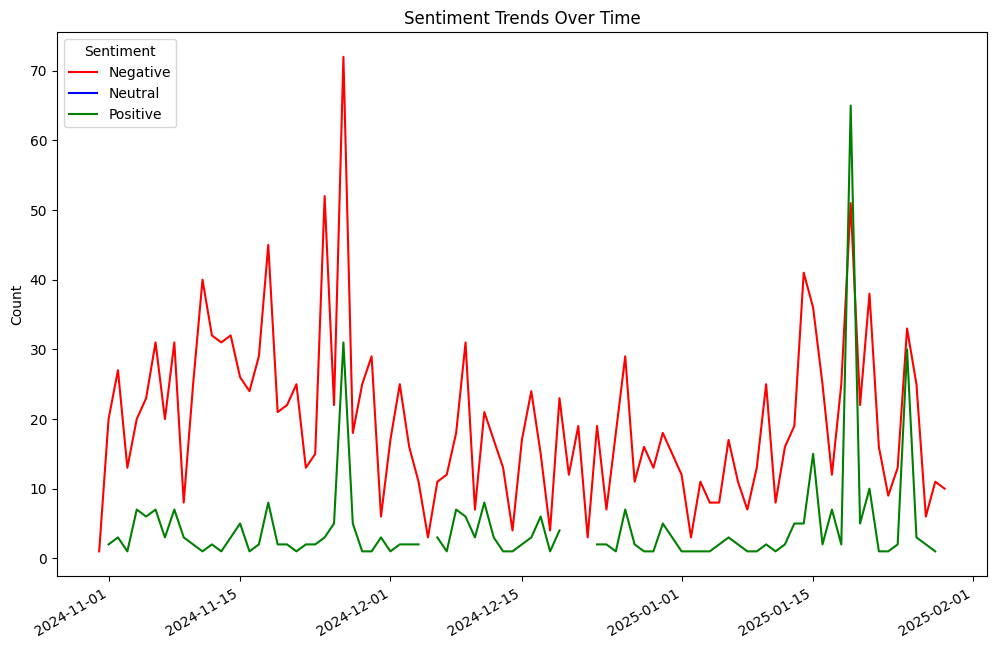

In [77]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Sentiment trends over time
df2.resample('D')['Sentiment'].value_counts().unstack().plot(kind='line', figsize=(12,8), color=["red", "blue", "green"])
plt.title("Sentiment Trends Over Time")
plt.xlabel("")
plt.ylabel("Count")
plt.legend(title="Sentiment", labels=["Negative", "Neutral", "Positive"], loc="upper left")
plt.savefig(os.path.join(output_dir, "sentiment_trends_over_time.png"), dpi=300)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


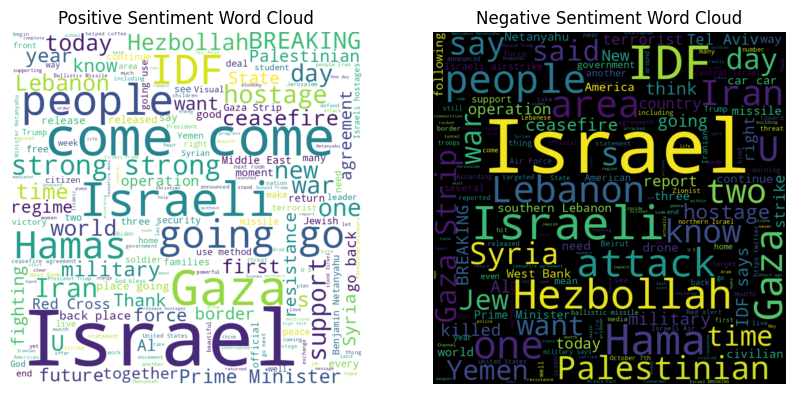

In [75]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize and filter words
df_pos = df2[df2['Sentiment'] == 'positive']
df_neg = df2[df2['Sentiment'] == 'negative']

# Remove stopwords from positive and negative words
pos_words = ' '.join(df_pos['Combined_text']).split()
neg_words = ' '.join(df_neg['Combined_text']).split()

# Filter stopwords
pos_words_filtered = [word for word in pos_words if word.lower() not in stop_words]
neg_words_filtered = [word for word in neg_words if word.lower() not in stop_words]

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=800, background_color="white").generate(' '.join(pos_words_filtered))
wordcloud_neg = WordCloud(width=800, height=800, background_color="black").generate(' '.join(neg_words_filtered))

# Plot word clouds
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.savefig(os.path.join(output_dir, "word_cloud.png"), dpi=300)
plt.show()

In [58]:
df2.columns

Index(['Message_ID', 'Combined_text', 'Total_Comments',
       'Text_Positive_Reactions', 'Text_Negative_Reactions', 'Sentiment'],
      dtype='object')

In [62]:
# Count the number of comments in each message
df2['Comment_Count'] = df2['Total_Comments'].apply(count_comments)

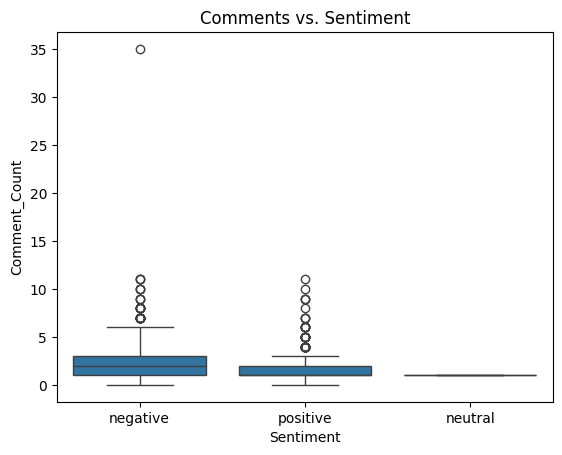

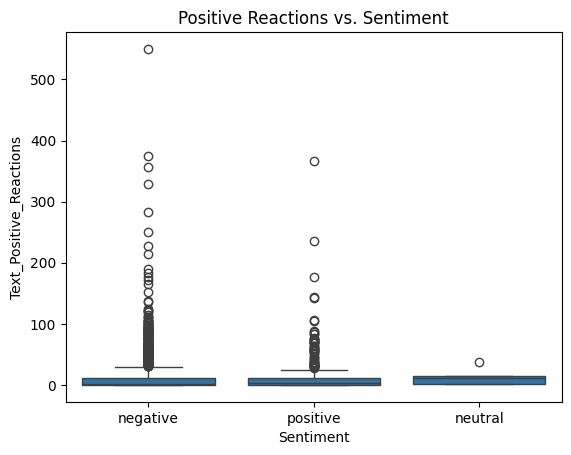

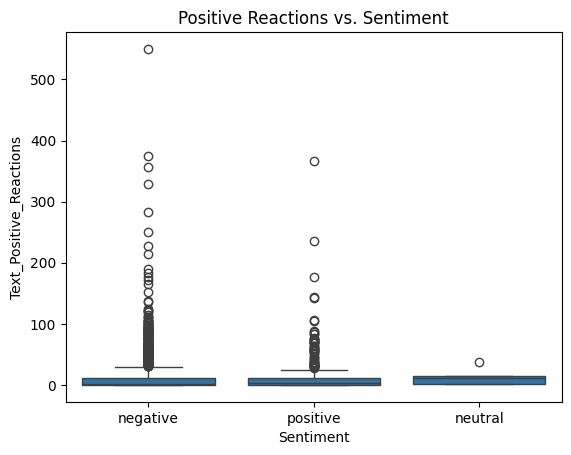

In [67]:
sns.boxplot(x='Sentiment', y='Comment_Count', data=df2)
plt.title("Comments vs. Sentiment")
plt.savefig(os.path.join(output_dir, "comment_vs_sentiment.png"), dpi=300)
plt.show()

sns.boxplot(x='Sentiment', y='Text_Positive_Reactions', data=df2)
plt.title("Positive Reactions vs. Sentiment")
plt.savefig(os.path.join(output_dir, "pos_reaction_vs_sentiment.png"), dpi=300)
plt.show()

sns.boxplot(x='Sentiment', y='Text_Positive_Reactions', data=df2)
plt.title("Positive Reactions vs. Sentiment")
plt.savefig(os.path.join(output_dir, "neg_reaction_vs_sentiment.png"), dpi=300)
plt.show()